# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [1]:
import pandas as pd
import torch
file="C:\\Users\\18816\\Downloads\\pets.csv"
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
df = pd.read_csv(file)
print(df)
# 2. Convert the categorical column ("PT") to numeric using label encoding.
#    This replaces each unique category with an integer code.
df['PT'] = df['PT'].astype('category').cat.codes

# 3. Separate features (x) and target (y).
#    Here, we treat "Prod" as the target variable and the rest as features.
features = df.drop(columns=['Prod',"PT","NTT","EW","DL"])
# features = df.drop(columns=['Prod',"PT","NTT","EW"])
target = df['Prod']

# 4. Optionally, convert the DataFrames/Series to NumPy arrays and specify dtype.
#    Note: You might want to check that all values are numeric. If not, further pre-processing
#    will be needed.
x_numpy = features.values.astype(float)
y_numpy = target.values.astype(float)

# 5. Convert the NumPy arrays into PyTorch tensors.
x_tensor = torch.tensor(x_numpy).to(dtype=torch.float32)
y_tensor = torch.tensor(y_numpy).to(dtype=torch.float32).unsqueeze(-1)

model=torch.nn.Linear(x_tensor.shape[1],y_tensor.shape[1])
# model=model.to(device)
loss=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
for epoch in range(1000):
    y_pred=model(x_tensor)
    loss_value=loss(y_pred,y_tensor.float())
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    if epoch%100==0:
        print(loss_value)
    # print(loss_value)
print(model.weight)


     NTT      Prod                    PT       PCT        EW        DL
0     34  2.773818                   Dog  4.771030  0.598049  1.997205
1     31  3.081907                   Cat  1.874099  0.695812  2.777835
2     29  3.818927                   Dog  2.747655  0.565748  1.681102
3     38  2.027085  Ranitomeya Amazonica  5.144583  0.209315  0.303526
4     31  3.024363                   Cat  4.821496  0.572177  1.727270
..   ...       ...                   ...       ...       ...       ...
245   24  3.959733  Ranitomeya Amazonica  3.306543  0.178393  0.377558
246   36  2.694795  Ranitomeya Amazonica  1.962848  0.376936  1.100118
247   27  3.905863                   Dog  2.703514  0.651405  0.796777
248   38  1.852925  Ranitomeya Amazonica  6.616894  0.258991  0.341964
249   35  2.493729                   Dog  4.465771  0.353822  1.222636

[250 rows x 6 columns]
tensor(7.2884, grad_fn=<MseLossBackward0>)
tensor(3.8443, grad_fn=<MseLossBackward0>)
tensor(2.6419, grad_fn=<MseLossBackwar

In [2]:
from better_kan import *

        
model = KAN([x_tensor.size(1),y_tensor.size(1)],10,bias_trainable=True,seed=1,symbolic_enabled=True)

Create dataset

In [3]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
# f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
# dataset = create_dataset(f, n_var=2)
# dataset['train_input'].shape, dataset['train_label'].shape
dataset={'train_input':x_tensor,'train_label':y_tensor,'test_input':x_tensor,'test_label':y_tensor}

Plot KAN at initialization

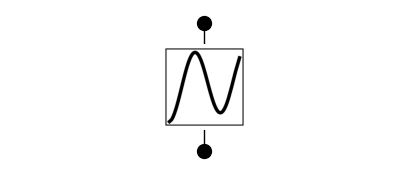

In [4]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

Train KAN with sparsity regularization

In [5]:
# train the model
model.train(dataset, opt="Adam", steps=2000, lamb=0.01,lr=0.1);

description:   0%|                                                         | 0/2000 [00:00<?, ?it/s]

train loss: 4.24e-01 | test loss: 3.99e-01 | reg: 3.05e-01 : 100%|█| 2000/2000 [00:11<00:00, 170.55i


Plot trained KAN

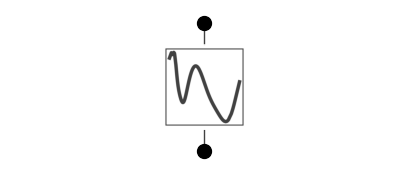

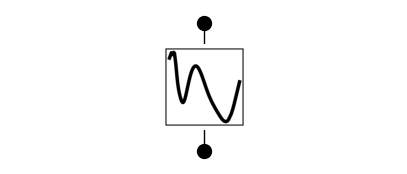

In [6]:
model.plot()
model.plot(beta=10000)

Prune KAN and replot (keep the original shape)

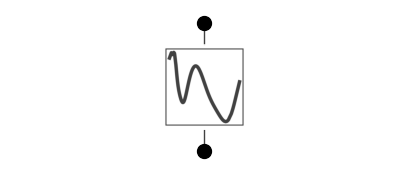

In [7]:
model.prune(0.05)
model.plot(mask=True)


Prune KAN and replot (get a smaller shape)

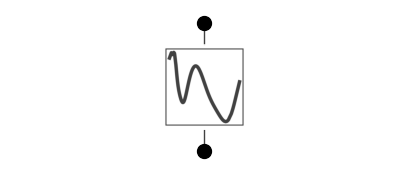

In [8]:
model = model.prune(0.05)
model(dataset['train_input'])
model.plot()

Continue training and replot

In [9]:
model.train(dataset, opt="LBFGS", steps=50,lr=0.1);

train loss: 3.69e-01 | test loss: 3.69e-01 | reg: 0.00e+00 : 100%|██| 50/50 [00:03<00:00, 14.48it/s]


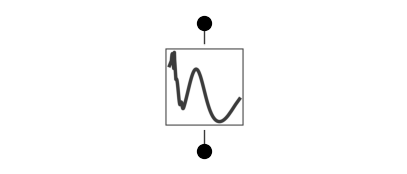

In [10]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [11]:
mode = "manual" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
print(model.symbolic_formula())

r2 is 0.4331677556037903
r2 is not very high, please double check if you are choosing the correct symbolic function.


IndexError: index 1 is out of bounds for dimension 0 with size 1

Continue training to almost machine precision

train loss: nan | test loss: nan | reg: 0.00e+00 : 100%|████████████| 50/50 [00:05<00:00,  8.78it/s]


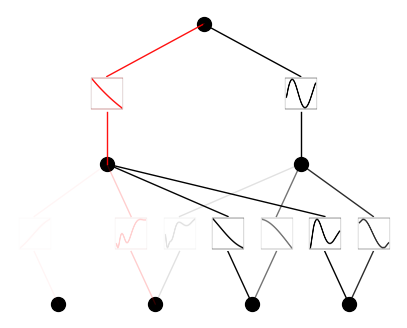

In [ ]:
model(dataset['train_input'])   
model.plot()

model.train(dataset, opt="LBFGS", steps=50,lr=0.1);

Obtain the symbolic formula

In [13]:
print(model.symbolic_formula(2))

'str' object is not callable
make sure all activations need to be converted to symbolic formulas first!
None
